In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('cap_price.csv')

In [3]:
df.head()

,Quarter,Price
0,2021-01,830.80
1,2021-02,800.00
2,2021-03,746.67
3,2021-04,940.00
4,2021-05,802.00


In [4]:
df.tail()

,Quarter,Price
22,2022-11,770.0
23,2022-12,850.0
24,2023-01,830.0
25,2023-02,780.0
26,2023-03,700.0


In [5]:
## Cleaning up the data
df.columns=["Quarter","Price"]
df.head()

,Quarter,Price
0,2021-01,830.80
1,2021-02,800.00
2,2021-03,746.67
3,2021-04,940.00
4,2021-05,802.00


In [6]:
# Convert Month into Datetime
df['Quarter']=pd.to_datetime(df['Quarter'])

In [7]:
df.head()

,Quarter,Price
0,2021-01-01,830.80
1,2021-02-01,800.00
2,2021-03-01,746.67
3,2021-04-01,940.00
4,2021-05-01,802.00


In [8]:
df.set_index('Quarter',inplace=True)

In [9]:
df.head()

,Price
Quarter,
2021-01-01,830.80
2021-02-01,800.00
2021-03-01,746.67
2021-04-01,940.00
2021-05-01,802.00


In [10]:
df.describe()

,Price
count,27.000000
mean,803.669630
std,65.491865
min,646.000000
25%,773.000000
50%,802.000000
75%,847.500000
max,940.000000


<Axes: xlabel='Quarter'>

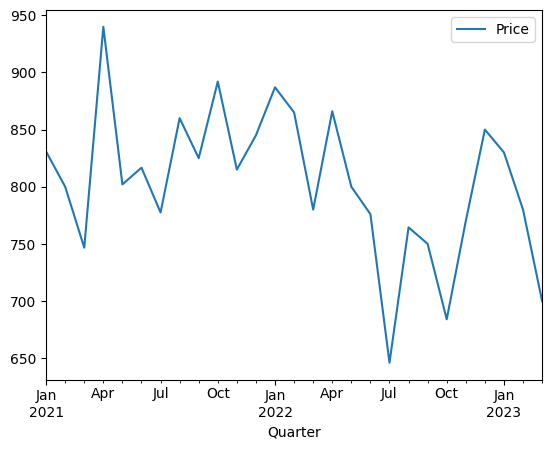

In [11]:
df.plot()

In [12]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Price'])

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [15]:
adfuller_test(df['Price'])

ADF Test Statistic : -3.603150237716381
p-value : 0.005701086781809878
#Lags Used : 0
Number of Observations Used : 26
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [16]:
df['Price First Difference'] = df['Price'] - df['Price'].shift(1)

In [17]:
df['Price'].shift(1)

Quarter
2021-01-01       NaN
2021-02-01    830.80
2021-03-01    800.00
2021-04-01    746.67
2021-05-01    940.00
2021-06-01    802.00
2021-07-01    816.67
2021-08-01    777.50
2021-09-01    860.00
2021-10-01    825.00
2021-11-01    892.00
2021-12-01    815.00
2022-01-01    845.00
2022-02-01    887.00
2022-03-01    865.00
2022-04-01    780.00
2022-05-01    866.00
2022-06-01    800.00
2022-07-01    776.00
2022-08-01    646.00
2022-09-01    764.44
2022-10-01    750.00
2022-11-01    684.00
2022-12-01    770.00
2023-01-01    850.00
2023-02-01    830.00
2023-03-01    780.00
Name: Price, dtype: float64

In [18]:
df['Seasonal First Difference']=df['Price']-df['Price'].shift(12)

In [19]:
df.head(14)

,Price,Price First Difference,Seasonal First Difference
Quarter,,,
2021-01-01,830.80,NaN,NaN
2021-02-01,800.00,-30.80,NaN
2021-03-01,746.67,-53.33,NaN
2021-04-01,940.00,193.33,NaN
2021-05-01,802.00,-138.00,NaN
2021-06-01,816.67,14.67,NaN
2021-07-01,777.50,-39.17,NaN
2021-08-01,860.00,82.50,NaN
2021-09-01,825.00,-35.00,NaN


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.945115152616266
p-value : 1.0018356223661783e-09
#Lags Used : 5
Number of Observations Used : 9
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Quarter'>

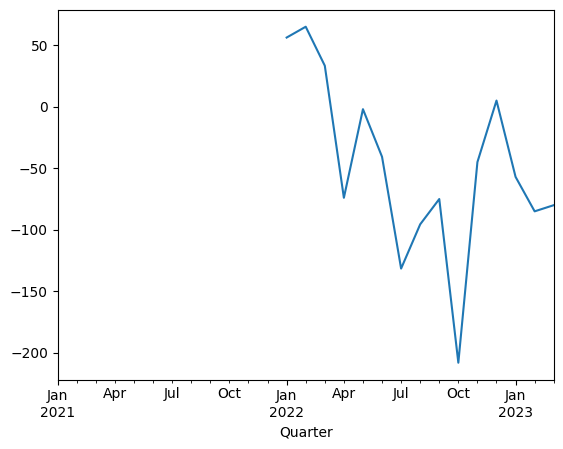

In [21]:
df['Seasonal First Difference'].plot()

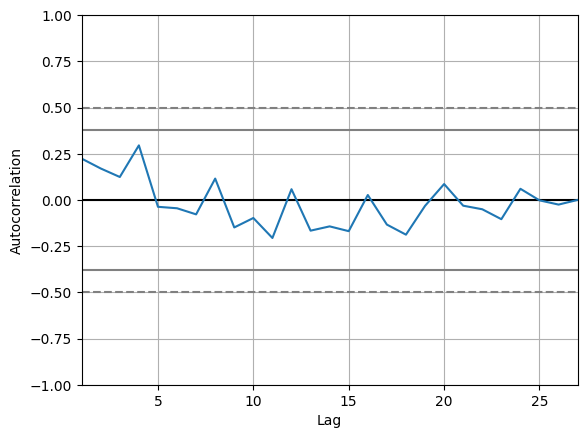

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Price'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
import statsmodels.api as sm

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


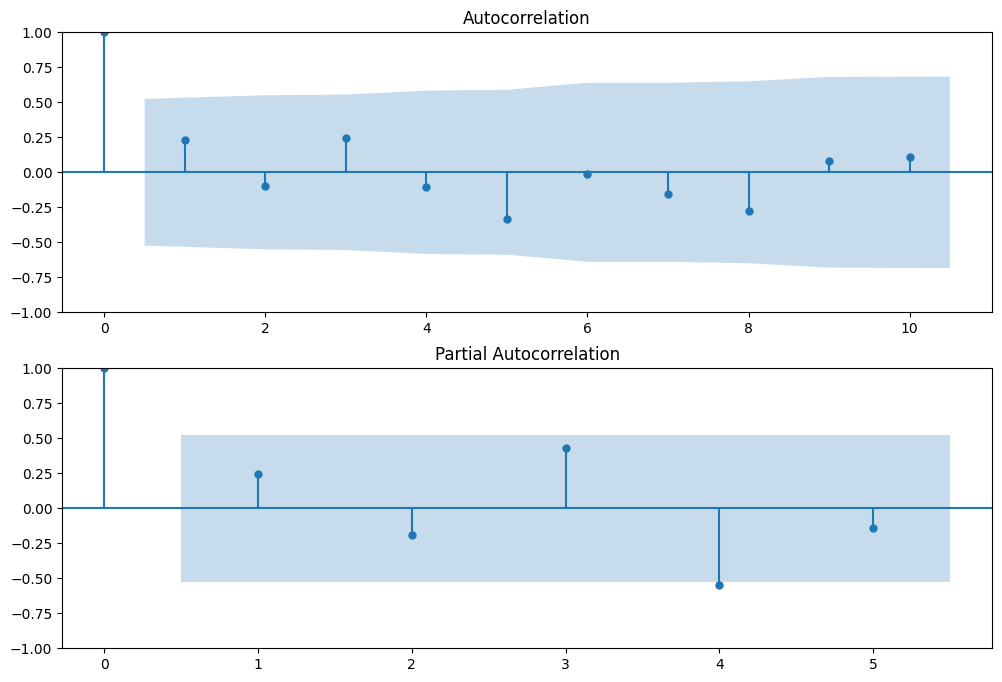

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=5,ax=ax2)

In [26]:
import statsmodels.api as sm

In [27]:
model=sm.tsa.statespace.SARIMAX(df['Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_re

<Axes: xlabel='Quarter'>

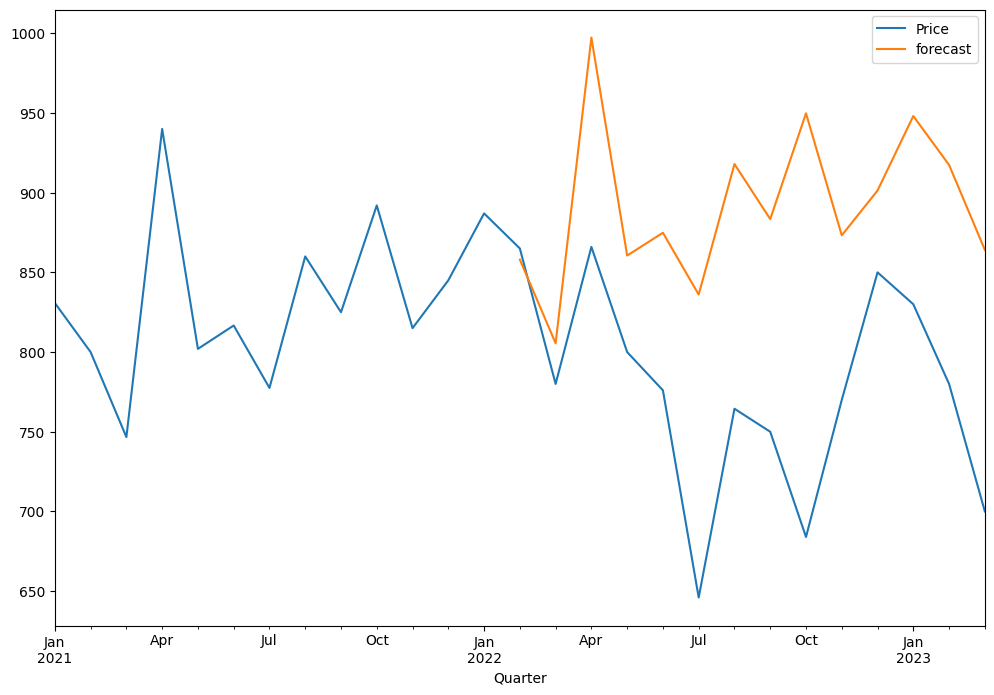

In [29]:
df['forecast']=results.predict(start=13,end=28,dynamic=True)
df[['Price','forecast']].plot(figsize=(12,8))

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [31]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [32]:
future_datest_df.tail()

,Price,Price First Difference,Seasonal First Difference,forecast
2024-10-01,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN,NaN
2025-01-01,NaN,NaN,NaN,NaN
2025-02-01,NaN,NaN,NaN,NaN


In [33]:
future_df=pd.concat([df,future_datest_df])

# Prediction forecasting - Capsicum Price

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

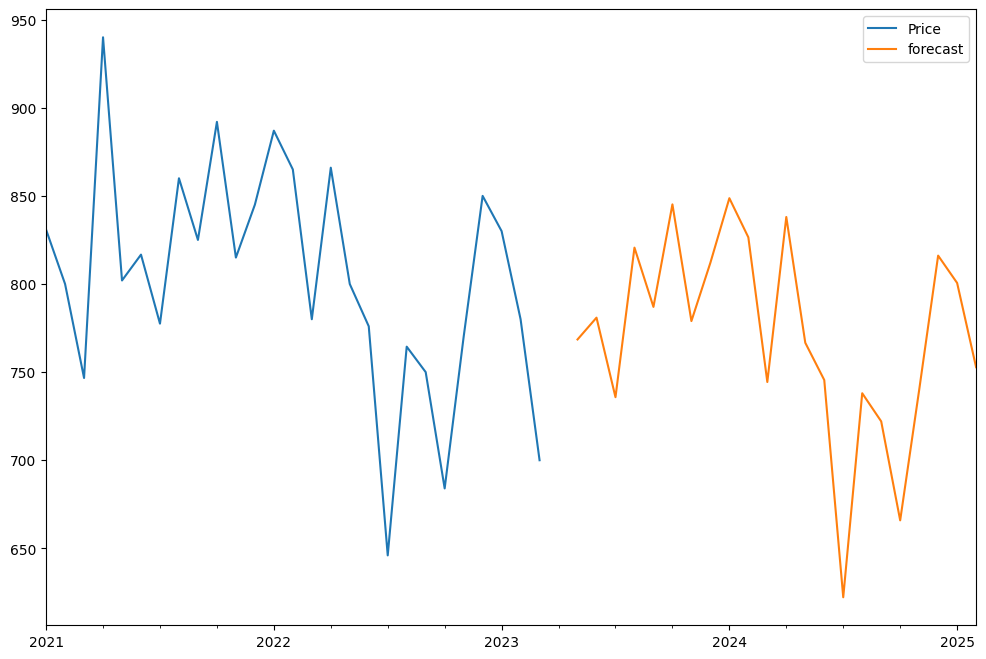

In [34]:
future_df['forecast'] = results.predict(start = 28, end = 50, dynamic= True)  
future_df[['Price', 'forecast']].plot(figsize=(12, 8)) 